<a href="https://colab.research.google.com/github/YeNhi22/CNTT1701_Nguyen-Vu-Yen-Nhi_BKT2/blob/main/CNTT1701_Nguy%E1%BB%85n_V%C5%A9_Y%E1%BA%BFn_Nhi_B%C3%A0i_ki%E1%BB%83m_tra_s%E1%BB%91_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-16-848991b4c34b>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Doanh thu (VND)"].fillna(df["Doanh thu (VND)"].mean(), inplace=True)
<ipython-input-16-848991b4c34b>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

Dữ liệu đã được làm sạch

Chỉ số thống kê cơ bản:

Thống kê cho Doanh thu (VND):
- Trung bình: 2242921.5457788347
- Trung vị: 2288152.0
- Phương sai: 2353711721271.606
- Min: 42734.0
- Max: 4801846.0

Thống kê cho Số lượng bán:
- Trung bình: 39.96551724137931
- Trung vị: 36.5
- Phương sai: 615.205707491082
- Min: 12.0
- Max: 94.0

Thống kê cho Đơn giá (VND):
- Trung bình: 59708.37963292585
- Trung vị: 47853.826318223866
- Phương sai: 3298722288.02877
- Min: -1666.666666666667
- Max: 240092.3


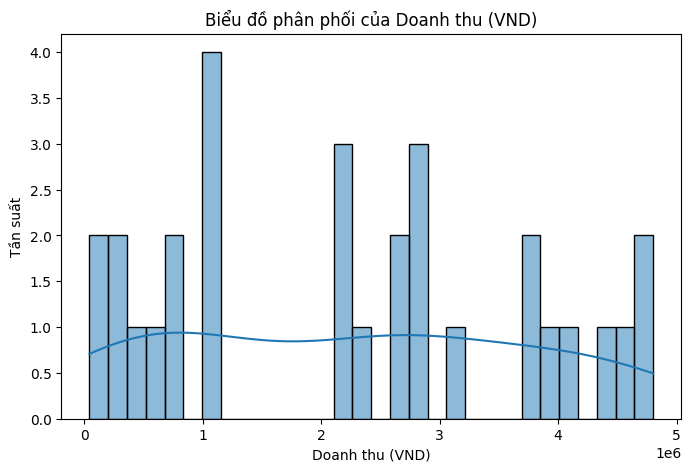

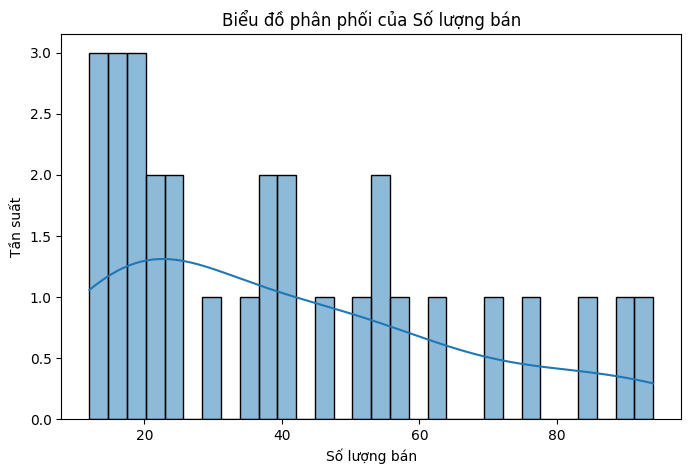

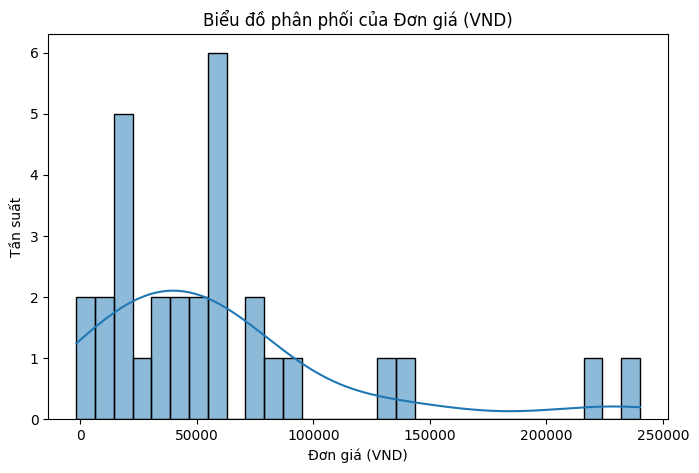


🔹 Kết quả hồi quy tuyến tính:
Phương trình hồi quy: y = 969035.50 + 31874.63x
Hệ số chặn (Intercept - beta_0): 969035.4968547027
Hệ số góc (Slope - beta_1): 31874.629351854903
Hệ số xác định (R²): 0.2656
Sai số bình phương trung bình (MSE): 1671045391492.3860


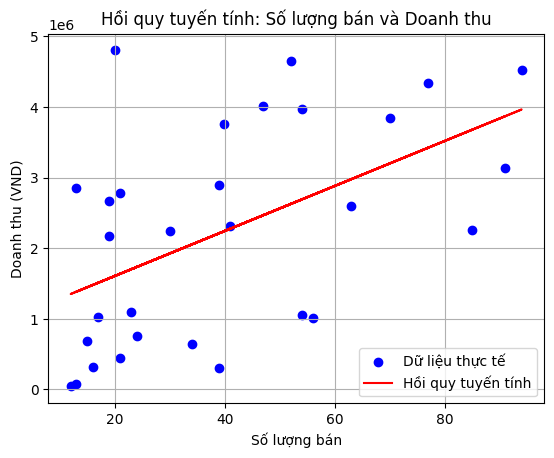

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Đọc file
df = pd.read_excel("/content/drive/MyDrive/CNTT1701_Nguyễn Vũ Yến Nhi_BKT2.xlsx")

# Xử lý lỗi định dạng ngày tháng
def clean_date(value):
    try:
        return pd.to_datetime(value, errors='coerce')  # Chuyển đổi ngày tháng, lỗi sẽ thành NaT
    except:
        return np.nan

df["Ngày"] = df["Ngày"].apply(clean_date)

# Xử lý giá trị bị thiếu bằng cách điền giá trị trung bình của cột
df.fillna(df.mean(numeric_only=True), inplace=True)

# Sửa lỗi giá trị âm trong "Doanh thu (VND)"
df["Doanh thu (VND)"] = df["Doanh thu (VND)"].apply(lambda x: np.nan if x < 0 else x)
df["Doanh thu (VND)"].fillna(df["Doanh thu (VND)"].mean(), inplace=True)

# Chuyển đổi dữ liệu sai định dạng trong "Số lượng bán"
def clean_quantity(value):
    try:
        return int(value) if str(value).isdigit() else np.nan
    except:
        return np.nan

df["Số lượng bán"] = df["Số lượng bán"].apply(clean_quantity)
df["Số lượng bán"].fillna(df["Số lượng bán"].mean(), inplace=True)

# Lưu lại file đã xử lý vào Google Drive
df.to_excel("/content/drive/MyDrive/cua_hang_cafe_clean.xlsx", index=False)

print("Dữ liệu đã được làm sạch")


#Mở file đã làm sạch
#df_cleaned = pd.read_excel("/content/drive/MyDrive/cua_hang_cafe_clean.xlsx")


# Tính toán và in các chỉ số thống kê cơ bản cho tất cả các biến số
print("\nChỉ số thống kê cơ bản:")
for column in df.select_dtypes(include=[np.number]).columns:
    print(f"\nThống kê cho {column}:")
    print(f"- Trung bình: {df[column].mean()}")
    print(f"- Trung vị: {df[column].median()}")
    print(f"- Phương sai: {df[column].var()}")
    print(f"- Min: {df[column].min()}")
    print(f"- Max: {df[column].max()}")

# Vẽ biểu đồ phân phối dữ liệu
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f"Biểu đồ phân phối của {column}")
    plt.xlabel(column)
    plt.ylabel("Tần suất")
    plt.show()

# Chuyển dữ liệu thành DataFrame
df = pd.DataFrame(df)

# Chuyển đổi thành mảng numpy
X = df["Số lượng bán"].values.reshape(-1, 1)  # Biến độc lập (reshape thành ma trận cột)
y = df["Doanh thu (VND)"].values  # Biến phụ thuộc

# 5️ Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

#  Tính toán hệ số hồi quy
beta_0 = model.intercept_  # Hệ số chặn
beta_1 = model.coef_[0]    # Hệ số góc

# Đánh giá mô hình
r2 = r2_score(y, y_pred)  # Hệ số xác định R^2
mse = mean_squared_error(y, y_pred)  # Sai số bình phương trung bình (MSE)

#  Hiển thị kết quả
print("\n🔹 Kết quả hồi quy tuyến tính:")
print(f"Phương trình hồi quy: y = {beta_0:.2f} + {beta_1:.2f}x")
print(f"Hệ số chặn (Intercept - beta_0): {beta_0}")
print(f"Hệ số góc (Slope - beta_1): {beta_1}")
print(f"Hệ số xác định (R²): {r2:.4f}")
print(f"Sai số bình phương trung bình (MSE): {mse:.4f}")

#  Vẽ biểu đồ
plt.scatter(X, y, color="blue", label="Dữ liệu thực tế")
plt.plot(X, y_pred, color="red", label="Hồi quy tuyến tính")
plt.title("Hồi quy tuyến tính: Số lượng bán và Doanh thu")
plt.xlabel("Số lượng bán")
plt.ylabel("Doanh thu (VND)")
plt.legend()
plt.grid(True)
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
